<a href="https://colab.research.google.com/github/alejabv4/Practica_hurtos/blob/main/AnalisisDeHurto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_hurto_motos = pd.read_csv('/content/drive/MyDrive/hurto_de_moto.csv')
df_hurto_a_persona = pd.read_csv('/content/drive/MyDrive/hurto_a_persona.csv')

<ipython-input-3-5c9774b6f580>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hurto_motos = pd.read_csv('/content/drive/MyDrive/hurto_de_moto.csv')
<ipython-input-3-5c9774b6f580>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hurto_a_persona = pd.read_csv('/content/drive/MyDrive/hurto_a_persona.csv')


In [ ]:
df_hurto_motos.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


In [ ]:
df_hurto_motos.describe()

#print(tbHurtos["cantidad"].mean())

,cantidad,latitud,longitud,edad,modelo
count,86410.0,68963.000000,68963.000000,86410.000000,86410.000000
mean,1.0,6.257591,-75.521848,29.635956,1425.347645
std,0.0,0.030826,1.993248,10.773765,910.950978
min,1.0,5.605000,-75.701329,-1.000000,-1.000000
25%,1.0,6.241436,-75.588720,23.000000,-1.000000
50%,1.0,6.257076,-75.570053,28.000000,2004.000000
75%,1.0,6.277458,-75.558006,35.000000,2012.000000
max,1.0,6.389618,-0.000678,122.000000,2029.000000


In [ ]:
df_hurto_motos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86410 entries, 0 to 86409
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha_hecho          86410 non-null  object 
 1   cantidad             86410 non-null  float64
 2   latitud              68963 non-null  float64
 3   longitud             68963 non-null  float64
 4   sexo                 86410 non-null  object 
 5   edad                 86410 non-null  int64  
 6   estado_civil         86410 non-null  object 
 7   grupo_actor          86410 non-null  object 
 8   actividad_delictiva  86410 non-null  object 
 9   parentesco           86410 non-null  object 
 10  ocupacion            86410 non-null  object 
 11  discapacidad         86410 non-null  object 
 12  grupo_especial       86410 non-null  object 
 13  medio_transporte     86410 non-null  object 
 14  nivel_academico      86410 non-null  object 
 15  testigo              86410 non-null 

In [ ]:
pd.unique(df_hurto_motos["nombre_barrio"])

array(['el pomar', 'la rosa', 'la isla', 'guayaquil', 'manrique',
       'campo amor', 'pajarito', 'trece de noviembre', 'aranjuez',
       'san benito', 'estadio', 'doce de octubre no.1', 'estación villa',
       'caribe', 'moscú no.1', 'san pablo', 'la cruz', 'tejelo',
       'las acacias', 'aures no.2', 'nueva villa del aburrá',
       'miraflores', 'loreto', 'san diego', 'corazón de jesús',
       'andalucía', 'prado', 'rosales', 'campo valdés no.1',
       'el chagualo', 'el danubio', 'miranda', 'antonio nariño',
       'el salvador', 'los ángeles', 'barrio colón',
       'área de expansión pajarito', 'trinidad', 'la mota', 'monteclaro',
       'villa carlota', 'bomboná no.2', 'las palmas', 'progreso',
       'cristo rey', 'bosques de san pablo', 'los conquistadores',
       'el diamante', 'villa nueva', 'área urbana cgto. san cristóbal',
       'castilla', 'el socorro', 'boyacá', 'santa fé', 'san joaquín',
       'sucre', 'santa inés', 'villa lilliam', 'universidad de antioquia',

In [10]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently tak

In [14]:
from skimpy import skim

In [16]:
skim(df_hurto_motos)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 86410  │ │ string      │ 30    │                                                          │
│ │ Number of columns │ 35     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA    ┃ NA %         ┃ mean   ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ cantidad │     0 │            0 │      1 │       0 │     1 │      1 │      1 │      1 │         1 │     █  │  │
│ │ latitud  │ 17447 │ 20.190950121 │  6.258 │ 0.03083 │ 5.605 │  6.241 │  6.257 │  6.277 │      6.39 │     █▇ │  │
│ │          │       │       513712 │        │         │       │        │        │        │           │        │  │
│ │ longitud │ 17447 │ 20.190950121 │ -75.52 │   1.993 │ -75.7 │ -75.59 │ -75.57 │ -75.56 │ -0.000678 │   █    │  │
│ │          │       │       513712 │        │         │       │        │        │        │           │        │  │
│ │ edad     │     0 │            0 │  29.64 │   10.77 │    -1 │     23 │     28 │     35 │       122 │  ▁█▂   │  │
│ │ modelo   │     0 │            0 │   1425 │     911 │    -1 │     -1 │   2004 │   2012 │      2029 │ ▃    █ │  │
│ └──────────┴───────┴──────────────┴────────┴─────────┴───────┴────────┴────────┴────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ fecha_hec │  0 │    0 │ 2017-01-0 │ 2017-01-0 │ 2003-01-0 │ 2023-11-3 │        29 │         1 │      86410 │  │
│ │ ho        │    │      │ 1T23:00:0 │ 1T23:00:0 │ 1T02:00:0 │ 0T23:50:0 │           │           │            │  │
│ │           │    │      │ 0.000-05: │ 0.000-05: │ 0.000-05: │ 0.000-05: │           │           │            │  │
│ │           │    │      │ 00        │ 00        │ 00        │ 00        │           │           │            │  │
│ │ sexo      │  0 │    0 │ Mujer     │ Sin dato  │ Hombre    │ Sin dato  │      5.87 │         1 │      88079 │  │
│ │ estado_ci │  0 │    0 │ Sin dato  │ Unión     │ Casado(a) │ Viudo(a)  │      11.6 │       1.7 │     142601 │  │
│ │ vil       │    │      │           │ marital   │           │           │           │           │            │  │
│ │           │    │      │           │ de hecho  │           │           │           │           │            │  │
│ │ grupo_act │  0 │    0 │ Sin dato  │ Sin dato  │ Sin 

In [17]:
df_hurto_motos.replace('Sin dato',"-")

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),-,-,-,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,-,-,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,-,-,-,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,-,-,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,-,-,-,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,-,-,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1,-,-,-,-,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,-,-,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),-,-,-,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,-,-,2024-10-06T04:04:55.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86405,2023-11-30T08:15:00.000-05:00,1.0,NaN,NaN,Hombre,-1,-,-,-,-,...,Vía pública,Laureles,-,-,-,-1,-,-,-,2024-10-06T04:04:55.000-05:00
86406,2023-11-30T08:30:00.000-05:00,1.0,NaN,NaN,Hombre,-1,-,-,-,-,...,Vía pública,Aranjuez,-,-,-,-1,-,-,-,2024-10-06T04:04:55.000-05:00
86407,2023-11-30T16:00:00.000-05:00,1.0,NaN,NaN,Hombre,24,-,-,-,-,...,Edificio,Laureles,-,-,-,-1,-,-,-,2024-10-06T04:04:55.000-05:00
86408,2023-11-30T20:13:00.000-05:00,1.0,NaN,NaN,Hombre,45,-,-,-,-,...,Vía pública,Candelaria,-,-,-,-1,-,-,-,2024-10-06T04:04:55.000-05:00


In [18]:
df_hurto_motos = df_hurto_motos.astype({'edad':'Int32'})

In [19]:
df_hurto_motos = df_hurto_motos.astype({'sexo':'category'})
df_hurto_motos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86410 entries, 0 to 86409
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   fecha_hecho          86410 non-null  object  
 1   cantidad             86410 non-null  float64 
 2   latitud              68963 non-null  float64 
 3   longitud             68963 non-null  float64 
 4   sexo                 86410 non-null  category
 5   edad                 86410 non-null  Int32   
 6   estado_civil         86410 non-null  object  
 7   grupo_actor          86410 non-null  object  
 8   actividad_delictiva  86410 non-null  object  
 9   parentesco           86410 non-null  object  
 10  ocupacion            86410 non-null  object  
 11  discapacidad         86410 non-null  object  
 12  grupo_especial       86410 non-null  object  
 13  medio_transporte     86410 non-null  object  
 14  nivel_academico      86410 non-null  object  
 15  testigo            

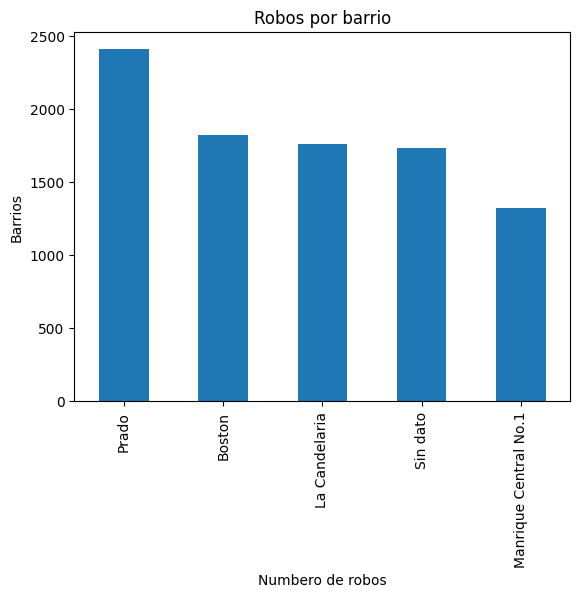

In [20]:
#graficas
import matplotlib.pyplot as plt

accidente_por_barrio = df_hurto_motos.groupby("nombre_barrio").size().sort_values(ascending=False).head(5)
#accidente_por_barrio.sort_values(ascending=False)

accidente_por_barrio.plot.bar(5)
# Add labels and title
plt.ylabel("Barrios")
plt.xlabel("Numbero de robos")
plt.title("Robos por barrio")
# Display the chart
plt.show()


In [21]:
accidente_por_estado_civil = df_hurto_motos.groupby("estado_civil").size().sort_values(ascending=False).head(5)
accidente_por_estado_civil

,0
estado_civil,
Soltero(a),45247
Unión marital de hecho,14473
Sin dato,12772
Casado(a),12243
Divorciado(a),1460


In [22]:
accidente_por_barrio_sexo = df_hurto_motos.groupby(["arma_medio","sexo"]).size().sort_values(ascending=False)
accidente_por_barrio_sexo

<ipython-input-22-14d3ccb5dadb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidente_por_barrio_sexo = df_hurto_motos.groupby(["arma_medio","sexo"]).size().sort_values(ascending=False)


,,0
arma_medio,sexo,
Llave maestra,Hombre,24879
Arma de fuego,Hombre,21479
No,Hombre,14340
Sin dato,Hombre,7611
Llave maestra,Mujer,4588
Arma de fuego,Mujer,4304
No,Mujer,3638
Sin dato,Mujer,1376
Objeto contundente,Hombre,979


In [23]:
accidente_por_barrio_sexo = (df_hurto_motos.groupby(["sexo"]).size()/df_hurto_motos.shape[0]*100).sort_values(ascending=False)
accidente_por_barrio_sexo

<ipython-input-23-5cd46534585e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidente_por_barrio_sexo = (df_hurto_motos.groupby(["sexo"]).size()/df_hurto_motos.shape[0]*100).sort_values(ascending=False)


,0
sexo,
Hombre,81.261428
Mujer,16.807083
Sin dato,1.931489


In [24]:
promedio_por_sexo = df_hurto_motos.groupby("sexo").size().agg(['min', 'max'])
promedio_por_sexo

<ipython-input-24-f0cbf0819433>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_por_sexo = df_hurto_motos.groupby("sexo").size().agg(['min', 'max'])


,0
min,1669
max,70218


NUEVO DATASET CREADO DESDE LISTAS


In [25]:
df_llenado = pd.DataFrame([[1,"vaca","gato"],[2,"","res"],[3,"","gato"]], columns=['Animal1', 'Animal2', 'Animal3'])

df_llenado = df_llenado.replace("",None)
df_llenado



,Animal1,Animal2,Animal3
0,1,vaca,gato
1,2,None,res
2,3,None,gato


In [26]:
pd.isna(df_llenado)
#print(df_llenado["Animal2"].unique())

,Animal1,Animal2,Animal3
0,False,False,False
1,False,True,False
2,False,True,False


In [27]:
df_llenado.iloc[0][1]

<ipython-input-27-aa763843dfc1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_llenado.iloc[0][1]


'vaca'

In [28]:
df_llenado_numerico = pd.DataFrame([[20, 'Luis', 3], [19, 'Eduardo', ''], [18, 'Juan', 2.5], [18, None, 2.5]],
                                   columns = ['Edad', 'Nombre', 'Promedio'],
                                   index = ['Estudiante1', 'Estudiante2', 'Estudiante3','Estudiante4'])
df_llenado_numerico

,Edad,Nombre,Promedio
Estudiante1,20,Luis,3
Estudiante2,19,Eduardo,
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [29]:
df_llenado_numerico[(df_llenado_numerico.Edad<19) & (df_llenado_numerico.Edad>=10)]

,Edad,Nombre,Promedio
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [30]:
df_llenado_numerico.loc["Estudiante1"]



,Estudiante1
Edad,20
Nombre,Luis
Promedio,3


In [31]:
df_llenado_numerico.iloc[0]

,Estudiante1
Edad,20
Nombre,Luis
Promedio,3


In [32]:
df_llenado_numerico = df_llenado_numerico.replace("",None)
df_llenado_numerico

,Edad,Nombre,Promedio
Estudiante1,20,Luis,3
Estudiante2,19,Eduardo,None
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [33]:
df_llenado_numerico1=df_llenado_numerico.fillna(0)
df_llenado_numerico1

<ipython-input-33-a59ef0543827>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_llenado_numerico1=df_llenado_numerico.fillna(0)


,Edad,Nombre,Promedio
Estudiante1,20,Luis,3.0
Estudiante2,19,Eduardo,0.0
Estudiante3,18,Juan,2.5
Estudiante4,18,0,2.5


In [34]:
df_llenado_numerico

,Edad,Nombre,Promedio
Estudiante1,20,Luis,3
Estudiante2,19,Eduardo,None
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [35]:
df_llenado_numerico.Promedio.median()


2.5

In [36]:
df_llenado_numerico.Promedio.mean()

2.6666666666666665

In [37]:
df_llenado_numerico2 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.median())
df_llenado_numerico2

<ipython-input-37-7b4f112d7cb8>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_llenado_numerico2 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.median())


,Edad,Nombre,Promedio
Estudiante1,20,Luis,3.0
Estudiante2,19,Eduardo,2.5
Estudiante3,18,Juan,2.5
Estudiante4,18,2.5,2.5


In [38]:
df_llenado_numerico3 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.mean())
df_llenado_numerico3

<ipython-input-38-891154c47afd>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_llenado_numerico3 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.mean())


,Edad,Nombre,Promedio
Estudiante1,20,Luis,3.000000
Estudiante2,19,Eduardo,2.666667
Estudiante3,18,Juan,2.500000
Estudiante4,18,2.666667,2.500000


CARGUE Y ANALISIS DE NUEVO DATASET


In [39]:
df_hurto_a_persona.describe()

,cantidad,latitud,longitud,edad,modelo
count,326489.0,284545.000000,284545.000000,326489.000000,326489.000000
mean,1.0,6.246950,-75.572000,34.335126,0.106527
std,0.0,0.037377,0.618576,13.120093,47.092037
min,1.0,3.855871,-76.317445,-1.000000,-1.000000
25%,1.0,6.234175,-75.587787,25.000000,-1.000000
50%,1.0,6.248980,-75.571988,32.000000,-1.000000
75%,1.0,6.259588,-75.565975,42.000000,-1.000000
max,1.0,10.155289,75.607180,121.000000,2023.000000


In [40]:
df_hurto_a_persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326489 entries, 0 to 326488
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          326489 non-null  object 
 1   cantidad             326489 non-null  float64
 2   latitud              284545 non-null  float64
 3   longitud             284545 non-null  float64
 4   sexo                 326489 non-null  object 
 5   edad                 326489 non-null  int64  
 6   estado_civil         326489 non-null  object 
 7   grupo_actor          326489 non-null  object 
 8   actividad_delictiva  326489 non-null  object 
 9   parentesco           326489 non-null  object 
 10  ocupacion            326489 non-null  object 
 11  discapacidad         326489 non-null  object 
 12  grupo_especial       326489 non-null  object 
 13  medio_transporte     326489 non-null  object 
 14  nivel_academico      326489 non-null  object 
 15  testigo          

In [41]:
df_hurto_a_persona['bien'].unique()

array(['Celular', 'Billetera', 'Elementos escolares', 'Cámara', 'Peso',
       'Cigarrillo', 'Computador', 'Cédula', 'Sin dato electrodomésticos',
       'Accesorios prendas de vestir', 'Licencia', 'Pasacintas', 'Euro',
       'Ropa exterior', 'Radio', 'Tablet', 'Salsa', 'Autopartes',
       'Sellos', 'Taladro', 'Maletín', 'Bicicleta',
       'Electrodomésticos cocina y limpieza hogar', 'Biseles',
       'Morral militar', 'Espejo', 'Factura',
       'Electrodoméstico video y audio y accesorios', 'Llave',
       'Sin dato joyas', 'Papel', 'Zapatos', 'Artículos de aseo personal',
       'Dólar', 'Pistola', 'Gato hidráulico', 'Medicamentos', 'Escritura',
       'Animales domésticos', 'Tarjeta bancaria', 'Módem', 'Encomiendas',
       'Accesorios celular', 'Sin dato documentos', 'Cargadores',
       'Elementos computador', 'Datáfono', 'Decoración del hogar', 'Soat',
       'Dvd', 'Casco moto', 'Ipod', 'Aluminio', 'Reja', 'Revólver',
       'Repuestos para maquinaria y equipo', 'Sin dato me

In [42]:
df_hurto_a_persona['categoria_bien'].unique()

array(['Tecnología', 'Prendas de vestir y accesorios',
       'Elementos escolares',
       'Dinero, joyas, piedras preciosas y título valor',
       'Artículos de fumador', 'Documentos', 'Electrodomésticos',
       'Alimento', 'Autoparte y elementos de la mecánica automotriz',
       'Otros elementos', 'Herramientas', 'Vehículos de 2 o 4 ruedas',
       'Accesorios militares, policía o vigilancia privada',
       'Librería, Papelería y útiles', 'Accesorios del hogar',
       'Arma de fuego', 'Medicamento', 'Fauna', 'Materia prima',
       'Materiales y elementos para la construcción',
       'Maquinaria y equipo', 'Sin dato mercancías', 'Automóvil',
       'Camionetas', 'Sin dato', 'Otras formas de transporte',
       'Equipamiento servicios públicos', 'Música', 'Vehículo panel',
       'Transporte aire', 'Licor', 'Artículos médicos',
       'Elementos para actividades al aire libre', 'Muebles', 'Químicos',
       'Equipamiento vías y señalización', 'Combustible', 'Flora',
       'Ele

In [43]:
#sumar los valores nulos de cada columna
df_hurto_a_persona.isnull().sum()

,0
fecha_hecho,0
cantidad,0
latitud,41944
longitud,41944
sexo,0
edad,0
estado_civil,0
grupo_actor,0
actividad_delictiva,0
parentesco,0


In [44]:
df_hurto_a_persona= df_hurto_a_persona.drop(columns=["ocupacion","nivel_academico","parentesco","discapacidad","grupo_actor",
                                "categoria_penal","grupo_especial","articulo_penal","permiso","testigo",
                                "caracterizacion","actividad_delictiva","unidad_medida"])

In [46]:
from skimpy import skim

skim(df_hurto_a_persona)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 326489 │ │ string      │ 17    │                                                          │
│ │ Number of columns │ 22     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA    ┃ NA %            ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ cantidad │     0 │               0 │      1 │       0 │      1 │      1 │      1 │      1 │     1 │     █  │  │
│ │ latitud  │ 41944 │ 12.846987187929 │  6.247 │ 0.03738 │  3.856 │  6.234 │  6.249 │   6.26 │ 10.16 │    █   │  │
│ │          │       │             761 │        │         │        │        │        │        │       │        │  │
│ │ longitud │ 41944 │ 12.846987187929 │ -75.57 │  0.6186 │ -76.32 │ -75.59 │ -75.57 │ -75.57 │ 75.61 │   █    │  │
│ │          │       │             761 │        │         │        │        │        │        │       │        │  │
│ │ edad     │     0 │               0 │  34.34 │   13.12 │     -1 │     25 │     32 │     42 │   121 │  ▁█▃▁  │  │
│ │ modelo   │     0 │               0 │ 0.1065 │   47.09 │     -1 │     -1 │     -1 │     -1 │  2023 │   █    │  │
│ └──────────┴───────┴─────────────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ fecha_hec │  0 │    0 │ 2017-01-0 │ 2017-01-0 │ 2003-01-0 │ 2023-11-3 │        29 │         1 │     326489 │  │
│ │ ho        │    │      │ 1T01:00:0 │ 1T01:00:0 │ 1T00:30:0 │ 0T23:30:0 │           │           │            │  │
│ │           │    │      │ 0.000-05: │ 0.000-05: │ 0.000-05: │ 0.000-05: │           │           │            │  │
│ │           │    │      │ 00        │ 00        │ 00        │ 00        │           │           │            │  │
│ │ sexo      │  0 │    0 │ Mujer     │ Sin dato  │ Hombre    │ Sin dato  │       5.6 │         1 │     328190 │  │
│ │ estado_ci │  0 │    0 │ Viudo(a)  │ Unión     │ Casado(a) │ Viudo(a)  │      11.3 │       1.5 │     498779 │  │
│ │ vil       │    │      │           │ marital   │           │           │           │           │            │  │
│ │           │    │      │           │ de hecho  │           │           │           │           │            │  │
│ │ medio_tra │  0 │    0 │ Taxi      │ Motocicle │ Auto

In [47]:
df_hurto_a_persona.shape

(326489, 23)

In [48]:
df_Barrio = df_hurto_a_persona.groupby("nombre_barrio").size().sort_values(ascending=False)
df_Barrio

,0
nombre_barrio,
La Candelaria,37473
El Poblado,9479
Guayaquil,6945
Barrio Colón,6654
Prado,5799
...,...
Sin dato 15 Guayabal,3
Sin dato 11 Laureles - Estadio,1
La Suiza,1


In [49]:
df_hurto_a_persona.shape

(326489, 23)

In [50]:
df_sexo_barrio = df_hurto_a_persona.groupby(["nombre_barrio","sexo"]).size().sort_values(ascending=False)
df_sexo_barrio

nombre_barrio         sexo    
La Candelaria         Hombre      19921
                      Mujer       17416
El Poblado            Hombre       5691
                      Mujer        3685
San Benito            Hombre       3562
                                  ...  
Universidad Nacional  Sin dato        1
La Milagrosa          Sin dato        1
El Jardin             Mujer           1
Barrio Caycedo        Sin dato        1
Girardot              Sin dato        1
Length: 860, dtype: int64

In [51]:
df_sexo_por_edad = df_hurto_a_persona.groupby(["nombre_barrio","sexo"]).size().sort_values(ascending=False)
df_sexo_por_edad

nombre_barrio         sexo    
La Candelaria         Hombre      19921
                      Mujer       17416
El Poblado            Hombre       5691
                      Mujer        3685
San Benito            Hombre       3562
                                  ...  
Universidad Nacional  Sin dato        1
La Milagrosa          Sin dato        1
El Jardin             Mujer           1
Barrio Caycedo        Sin dato        1
Girardot              Sin dato        1
Length: 860, dtype: int64

In [52]:
df_sexo_por_edad.std()

1061.5264420245257

In [53]:
df_sexo_por_edad.mean()

379.63837209302324

In [54]:
#promedio de edad por barrio
avg_barrio= df_hurto_a_persona.groupby('nombre_barrio')['edad'].mean().sort_values(ascending=False)
avg_barrio

,edad
nombre_barrio,
Barro Blanco,49.666667
Potrera Miserenga,48.666667
Sin dato 15 Guayabal,47.666667
Volcana Guayabal,44.055556
El Astillero,43.642857
...,...
Sin dato 3 Manrique,25.142857
Área de expansión Eduardo Santos,21.000000
La Ilusion,16.000000


In [55]:
df_sexo_por_edad.std()

1061.5264420245257

In [56]:
df_sexo_estado = df_hurto_a_persona.groupby(["sexo","estado_civil","nombre_barrio"]).size().sort_values(ascending=False)
df_sexo_estado

sexo    estado_civil            nombre_barrio        
Hombre  Soltero(a)              La Candelaria            10368
Mujer   Soltero(a)              La Candelaria             9406
Hombre  Unión marital de hecho  La Candelaria             3362
        Casado(a)               La Candelaria             3259
        Soltero(a)              El Poblado                3159
                                                         ...  
Mujer   Viudo(a)                Villa Niza                   1
Hombre  Viudo(a)                Moscú No.1                   1
Mujer   Viudo(a)                Villa Guadalupe              1
Hombre  Viudo(a)                Monteclaro                   1
Mujer   Viudo(a)                Francisco Antonio Zea        1
Length: 3671, dtype: int64

In [57]:
df_hurto_a_persona[df_hurto_a_persona.nombre_barrio=="El Poblado"]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,...,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,fecha_ingestion
183,2017-01-05T11:35:00.000-05:00,1.0,6.209276,-75.570019,Mujer,27,Soltero(a),Caminata,Hurto a persona,Descuido,...,#1418,14,Vía pública,Poblado,Celular,Tecnología,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
277,2017-01-07T12:30:00.000-05:00,1.0,6.209088,-75.566679,Mujer,30,Soltero(a),Caminata,Hurto a persona,Raponazo,...,#1418,14,Vía pública,Poblado,Accesorios prendas de vestir,Prendas de vestir y accesorios,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
295,2017-01-08T02:00:00.000-05:00,1.0,6.209722,-75.569056,Mujer,26,Soltero(a),Caminata,Hurto a persona,Cosquilleo,...,#1418,14,Vía pública,Poblado,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
325,2017-01-09T06:00:00.000-05:00,1.0,6.208683,-75.565638,Hombre,27,Soltero(a),Caminata,Hurto a persona,Atraco,...,#1418,14,Vía pública,Poblado,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
331,2017-01-09T08:15:00.000-05:00,1.0,6.210581,-75.570337,Mujer,26,Soltero(a),Caminata,Hurto a persona,Raponazo,...,#1418,14,Vía pública,Poblado,Maletín,Otros elementos,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326295,2023-11-25T16:30:00.000-05:00,1.0,NaN,NaN,Mujer,40,Sin dato,Caminata,Hurto a persona,Atraco,...,#1418,14,Centro comercial,Poblado,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326297,2023-11-25T17:00:00.000-05:00,1.0,NaN,NaN,Mujer,52,Sin dato,Caminata,Hurto a persona,Atraco,...,#1418,14,Centro comercial,Manrique,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326331,2023-11-26T19:00:00.000-05:00,1.0,NaN,NaN,Mujer,35,Sin dato,Caminata,Hurto a persona,Cosquilleo,...,#1418,14,Centro comercial,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326335,2023-11-27T01:00:00.000-05:00,1.0,NaN,NaN,Hombre,71,Sin dato,Caminata,Hurto a persona,Rompimiento cerradura,...,#1418,14,Bodega,Belén,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00


IMPUTACION DE DATOS
Relleno de información de vscios sin alterar el promedio.

Un histograma nos ayuda a identificar el rango de datos

si mi desviacion estandar en muy grande, no bastará la media para haer imputación.

Text(0.5, 1.0, 'Histograma de la columna Edad')

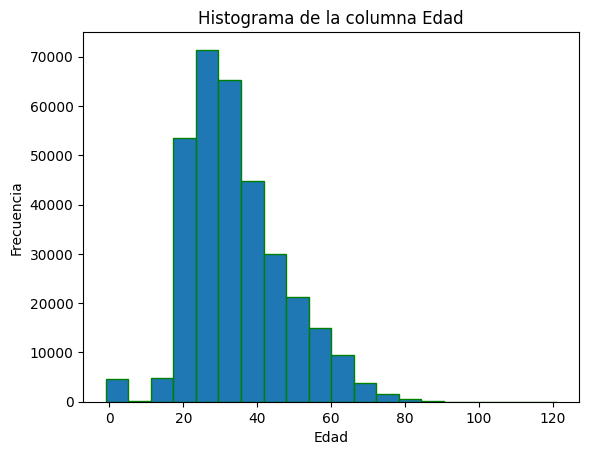

In [58]:
# histograma de la columna edad del df tbHurto_a_persona

# Create the histogram
plt.hist(df_hurto_a_persona['edad'].dropna(), bins=20, edgecolor='green')  # Adjust bins as needed
# Add labels and title
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Edad')

# Display the histogram
#plt.show()


(array([4.6010e+03, 3.6000e+01, 2.2000e+01, 2.2000e+01, 8.7000e+01,
        2.8500e+02, 2.3220e+03, 8.3090e+03, 1.6861e+04, 3.0424e+04,
        2.3848e+04, 3.6247e+04, 2.3165e+04, 3.1334e+04, 2.2103e+04,
        2.4187e+04, 1.4141e+04, 1.2495e+04, 1.5336e+04, 8.5430e+03,
        1.1395e+04, 6.7440e+03, 8.9130e+03, 5.0550e+03, 4.1250e+03,
        5.0540e+03, 2.4550e+03, 2.8040e+03, 1.4550e+03, 1.6240e+03,
        7.5600e+02, 6.9000e+02, 3.7900e+02, 2.1700e+02, 2.3200e+02,
        9.9000e+01, 6.9000e+01, 2.7000e+01, 1.7000e+01, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ -1.  ,   1.44,   3.88,   6.32,   8.76,  11.2 ,  13.64,  16.08,
         18.52,  20.96,  23.4 ,  25.84,  28.28,  30.72,  33.16,  35.6 ,
         38.04,  40.48,  42.92,  45.36,  47.8 ,  50.24,  52.68,  55.12,
         57.56,  60.  ,  62.44,  64.88,  67.32,  69.76,  72.2 ,  74.64,
         77.08,  79.52,  81.96

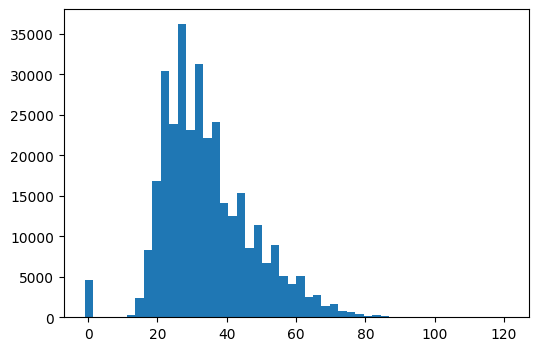

In [59]:
plt.figure(figsize=[6,4]) #configura el tamaño del grafico
plt.hist(df_hurto_a_persona['edad'], bins=50)

In [60]:
#!pip install miceforest
# es un argoritmo para rellenar los datos vacios de mis datos vacios en la base de datos

In [62]:
!pip install miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00


In [63]:
import miceforest as mf
from sklearn.datasets import load_iris #extrae el dataset iris
from sklearn import datasets
#import numpy as np

In [64]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # convertir iris a df to DataFrame

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
iris_df['target']= iris.target
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [66]:
iris_df.rename({"target":"species"}, inplace=True, axis=1)
#iris_df['nombre'] = iris.target_names
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [68]:
#aisgno valores nulos aleatoriamente
iris_amp = mf.ampute_data(iris_df, perc=0.25, random_state=2000)
iris_amp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,NaN,3.5,1.4,NaN,0
1,4.9,3.0,1.4,NaN,NaN
2,4.7,3.2,1.3,0.2,0
3,NaN,NaN,1.5,NaN,0
4,5.0,NaN,1.4,0.2,NaN
...,...,...,...,...,...
145,6.7,NaN,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,NaN,5.2,2.0,NaN
148,6.2,3.4,5.4,NaN,2


In [69]:
#correr el algoritmo MICE durante 2 iteraciones
kds = mf.ImputationKernel(
    iris_amp,
    random_state=2000
  )

kds.mice(2)

#retorna el dataset completo
iris_completo = kds.complete_data()

In [70]:
iris_completo

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.3,3.5,1.4,0.4,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,5.1,3.5,1.5,0.3,0
4,5.0,3.2,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.3,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,2.8,5.2,2.0,2
148,6.2,3.4,5.4,2.4,2


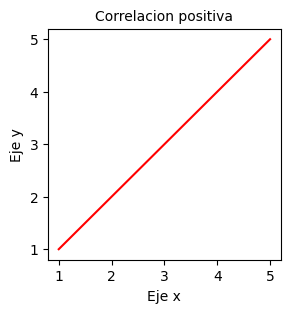

In [71]:
#import matplotlib as plt

x = [1,2,3,4,5]
y = [1,2,3,4,5]

plt.figure(figsize=[3,3])
plt.plot(x,y, color ='red')
plt.title('Correlacion positiva', fontsize =10)
plt.xlabel('Eje x', fontsize =10)
plt.ylabel('Eje y', fontsize =10)
plt.show()

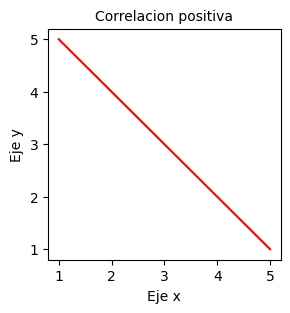

In [72]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]

plt.figure(figsize=[3,3])
plt.plot(x,y, color ='red')
plt.title('Correlacion positiva', fontsize =10)
plt.xlabel('Eje x', fontsize =10)
plt.ylabel('Eje y', fontsize =10)
plt.show()

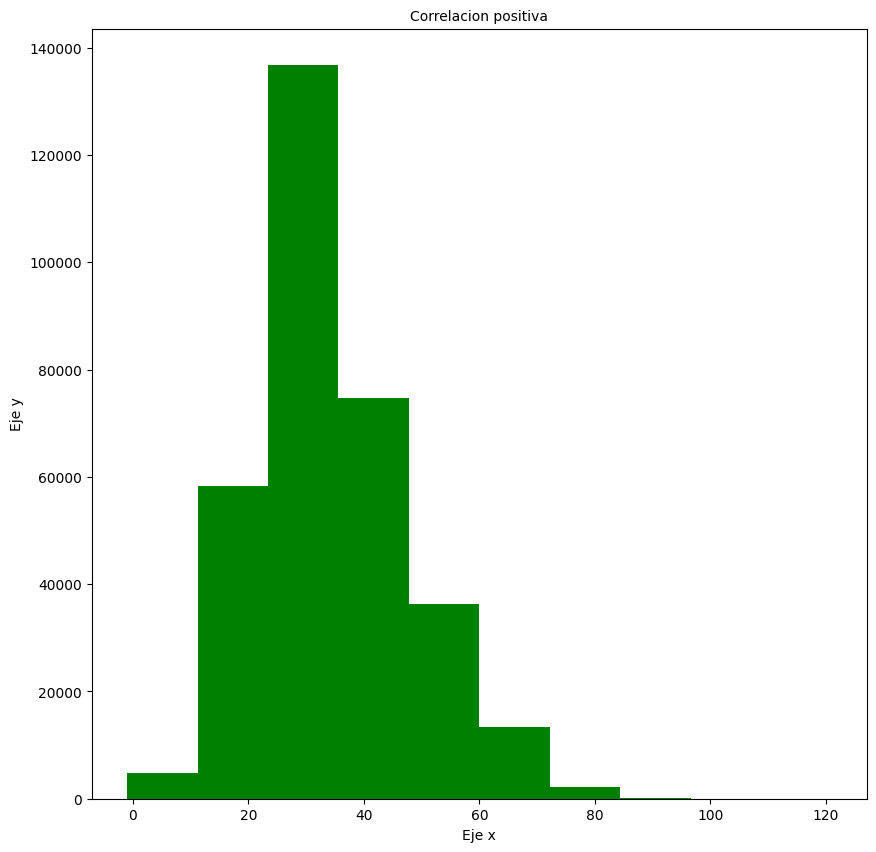

In [74]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]

plt.figure(figsize=[10,10])
plt.hist(df_hurto_a_persona['edad'], color ='green')
plt.title('Correlacion positiva', fontsize =10)
plt.xlabel('Eje x', fontsize =10)
plt.ylabel('Eje y', fontsize =10)
plt.show()

In [75]:
#Transformación de fecha de hecho

df_fecha = pd.Series(df_hurto_motos['fecha_hecho'])
df_fecha

,fecha_hecho
0,2017-01-01T23:00:00.000-05:00
1,2017-01-01T20:30:00.000-05:00
2,2017-01-01T07:00:00.000-05:00
3,2017-01-01T09:00:00.000-05:00
4,2017-01-01T16:30:00.000-05:00
...,...
86405,2023-11-30T08:15:00.000-05:00
86406,2023-11-30T08:30:00.000-05:00
86407,2023-11-30T16:00:00.000-05:00
86408,2023-11-30T20:13:00.000-05:00


In [76]:
df_fecha = df_fecha.str.split('T') #Divide el texto cuando encuentra la T. Lo vuelve lista
df_fecha

,fecha_hecho
0,"[2017-01-01, 23:00:00.000-05:00]"
1,"[2017-01-01, 20:30:00.000-05:00]"
2,"[2017-01-01, 07:00:00.000-05:00]"
3,"[2017-01-01, 09:00:00.000-05:00]"
4,"[2017-01-01, 16:30:00.000-05:00]"
...,...
86405,"[2023-11-30, 08:15:00.000-05:00]"
86406,"[2023-11-30, 08:30:00.000-05:00]"
86407,"[2023-11-30, 16:00:00.000-05:00]"
86408,"[2023-11-30, 20:13:00.000-05:00]"


In [77]:
#Separación de fechas y horas

df_fecha = pd.DataFrame(df_fecha) #convierte en DataFrame
df_fecha = pd.DataFrame(df_fecha.fecha_hecho.values.tolist(), index = df_fecha.index)
df_fecha = df_fecha.rename(columns={0:'Fecha',1:'Hora'})
df_fecha

,Fecha,Hora
0,2017-01-01,23:00:00.000-05:00
1,2017-01-01,20:30:00.000-05:00
2,2017-01-01,07:00:00.000-05:00
3,2017-01-01,09:00:00.000-05:00
4,2017-01-01,16:30:00.000-05:00
...,...,...
86405,2023-11-30,08:15:00.000-05:00
86406,2023-11-30,08:30:00.000-05:00
86407,2023-11-30,16:00:00.000-05:00
86408,2023-11-30,20:13:00.000-05:00


In [78]:
#
df_fecha_datetime = pd.to_datetime(df_fecha['Fecha'], format = '%Y-%m-%d')
print(f'Fecha minima: {df_fecha_datetime.min()}')
print(f'Fecha máxima: {df_fecha_datetime.max()}')

Fecha minima: 2003-01-01 00:00:00
Fecha máxima: 2023-11-30 00:00:00


In [79]:
type(df_fecha_datetime)

pandas.core.series.Series

In [80]:
df_fecha_datetime_anno = df_fecha_datetime.dt.year
df_fecha_datetime_anno = pd.DataFrame(df_fecha_datetime_anno)
df_fecha_datetime_anno

,Fecha
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
86405,2023
86406,2023
86407,2023
86408,2023


In [81]:
df_fecha_datetime_mes = df_fecha_datetime.dt.month
df_fecha_datetime_mes = pd.DataFrame(df_fecha_datetime_mes)
df_fecha_datetime_mes

,Fecha
0,1
1,1
2,1
3,1
4,1
...,...
86405,11
86406,11
86407,11
86408,11


In [82]:
df_fecha_datetime_mes_name = df_fecha_datetime.dt.month_name
df_fecha_datetime_mes_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7c6746b968d0>>

In [83]:
#identificación días de la semana
df_fecha_datetime_dia = df_fecha_datetime.dt.day_of_week
df_fecha_datetime_dia = pd.DataFrame(df_fecha_datetime_dia)
df_fecha_datetime_dia

,Fecha
0,6
1,6
2,6
3,6
4,6
...,...
86405,3
86406,3
86407,3
86408,3


In [84]:
#Histograma sobre los días
import seaborn as sns  #libreria para crear gráficos estadísticos
import matplotlib.pyplot as plt #libreria para crear gráficos generales

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

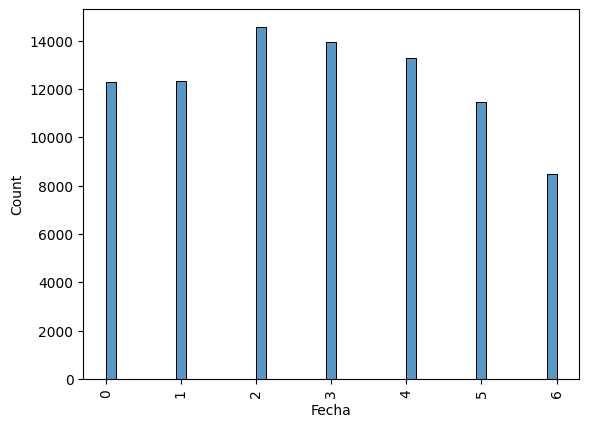

In [85]:
sns.histplot(data=df_fecha_datetime_dia, x = 'Fecha', stat = 'count')
plt.xticks(rotation = 90)

<Axes: xlabel='Fecha', ylabel='Count'>

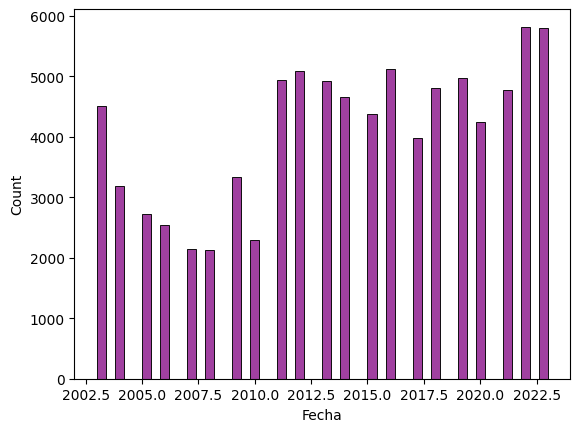

In [86]:
sns.histplot(data=df_fecha_datetime_anno, x = 'Fecha', stat = 'count', color = 'purple')


In [87]:
df_fecha_agr = df_fecha.groupby('Fecha').size()
df_fecha_agr

,0
Fecha,
2003-01-01,10
2003-01-02,6
2003-01-03,8
2003-01-04,10
2003-01-05,6
...,...
2023-11-26,8
2023-11-27,9
2023-11-28,3


<Figure size 1200x600 with 0 Axes>

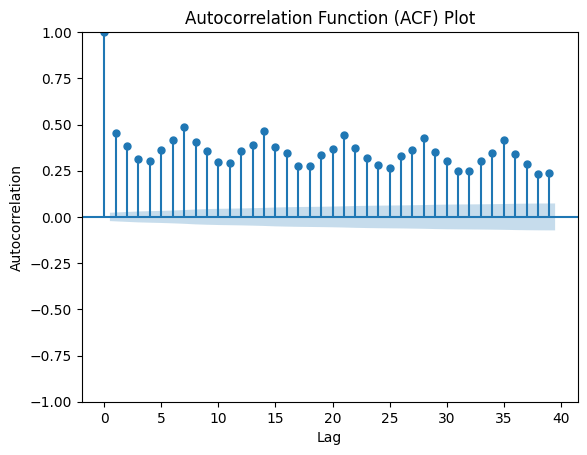

In [88]:
#calcular autocorrelación en la serie de tiempo
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(df_fecha_agr) #you can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [89]:
#convertir todos a minuscula
df_hurto_motos.nombre_barrio = df_hurto_motos.nombre_barrio.str.lower()
#quitar espacios en blanco al final
df_hurto_motos.nombre_barrio = df_hurto_motos.nombre_barrio.str.strip()

In [90]:
#retorna todos los valores unicos de la columna nombre barrio
barrios = df_hurto_motos['nombre_barrio'].unique()
barrios

array(['el pomar', 'la rosa', 'la isla', 'guayaquil',
       'manrique central no.1', 'campo amor', 'pajarito',
       'trece de noviembre', 'aranjuez', 'san benito', 'estadio',
       'doce de octubre no.1', 'estación villa', 'caribe', 'moscú no.1',
       'san pablo', 'la cruz', 'tejelo', 'las acacias', 'aures no.2',
       'nueva villa del aburrá', 'miraflores', 'loreto', 'san diego',
       'corazón de jesús', 'andalucía', 'prado',
       'área urbana cgto. san antonio de prado', 'rosales',
       'campo valdés no.1', 'el chagualo', 'el danubio', 'miranda',
       'antonio nariño', 'el salvador', 'los ángeles', 'barrio colón',
       'área de expansión pajarito', 'trinidad', 'la mota', 'monteclaro',
       'villa carlota', 'bomboná no.2', 'las palmas', 'progreso',
       'cristo rey', 'bosques de san pablo', 'los conquistadores',
       'el diamante', 'villa nueva', 'área urbana cgto. san cristóbal',
       'castilla', 'el socorro', 'boyacá', 'santa fé', 'san joaquín',
       'sucr

In [91]:
barrios

array(['el pomar', 'la rosa', 'la isla', 'guayaquil',
       'manrique central no.1', 'campo amor', 'pajarito',
       'trece de noviembre', 'aranjuez', 'san benito', 'estadio',
       'doce de octubre no.1', 'estación villa', 'caribe', 'moscú no.1',
       'san pablo', 'la cruz', 'tejelo', 'las acacias', 'aures no.2',
       'nueva villa del aburrá', 'miraflores', 'loreto', 'san diego',
       'corazón de jesús', 'andalucía', 'prado',
       'área urbana cgto. san antonio de prado', 'rosales',
       'campo valdés no.1', 'el chagualo', 'el danubio', 'miranda',
       'antonio nariño', 'el salvador', 'los ángeles', 'barrio colón',
       'área de expansión pajarito', 'trinidad', 'la mota', 'monteclaro',
       'villa carlota', 'bomboná no.2', 'las palmas', 'progreso',
       'cristo rey', 'bosques de san pablo', 'los conquistadores',
       'el diamante', 'villa nueva', 'área urbana cgto. san cristóbal',
       'castilla', 'el socorro', 'boyacá', 'santa fé', 'san joaquín',
       'sucr

In [92]:
#librerias para identificar registros similares
!pip install fuzzywuzzy

In [93]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [94]:
matches = fuzzywuzzy.process.extract('florida', barrios, limit=20, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('la florida', 82),
 ('florencia', 75),
 ('florida nueva', 70),
 ('villa flora', 67),
 ('lorena', 62),
 ('la gloria', 62),
 ('la florida s.a.p.', 61),
 ('moravia', 57),
 ('la floresta', 56),
 ('trinidad', 53),
 ('fátima', 50),
 ('el raizal', 50),
 ('miraflores', 47),
 ('la pradera', 47),
 ('la frisola', 47),
 ('loreto', 46),
 ('la pilarica', 44),
 ('bolivariana', 44),
 ('aguas frias', 44),
 ('la rosa', 43)]

In [95]:
df_hurto_motos.replace('sin dato 3 manrique','manrique', inplace=True)
df_hurto_motos.replace('manrique oriental','manrique', inplace=True)
df_hurto_motos.replace('manrique central no.1','manrique', inplace=True)
df_hurto_motos.replace('manrique central no.2','manrique', inplace=True)

In [96]:
df_hurto_motos.replace('sin dato 16 belen','belén', inplace=True)
df_hurto_motos.replace('sin dato 7 robledo','robledo', inplace=True)
df_hurto_motos.replace('sin dato 50 palmitas', 'palmitas', inplace=True)
df_hurto_motos.replace('palmitas sector central', 'palmitas', inplace=True)
df_hurto_motos.replace('la palma s.c.', 'la palma', inplace=True)
df_hurto_motos.replace('las palmas s.e.', 'las palmas', inplace=True)
df_hurto_motos.replace('sin dato 13 san javier', 'san javier', inplace=True)
df_hurto_motos.replace('san javier no.2', 'san javier', inplace=True)
df_hurto_motos.replace('san javier no.1', 'san javier', inplace=True)
df_hurto_motos.replace('sin dato 60 san cristobal', 'san cristobal', inplace=True)
df_hurto_motos.replace('barrio cristóbal', 'san cristobal', inplace=True)
df_hurto_motos.replace('cerro nutibara ins.', 'cerro nutibara', inplace=True)
df_hurto_motos.replace('los balsos no.1', 'los balsos', inplace=True)
df_hurto_motos.replace('los balsos no.2', 'los balsos', inplace=True)
df_hurto_motos.replace('área urbana cgto. san antonio de prado', 'prado', inplace=True)
df_hurto_motos.replace('sin dato 90 santa elena', 'santa elena', inplace=True)
df_hurto_motos.replace('santa elena sector central', 'santa elena', inplace=True)

In [97]:
barrios = df_hurto_motos['nombre_barrio'].unique()
barrios

array(['el pomar', 'la rosa', 'la isla', 'guayaquil', 'manrique',
       'campo amor', 'pajarito', 'trece de noviembre', 'aranjuez',
       'san benito', 'estadio', 'doce de octubre no.1', 'estación villa',
       'caribe', 'moscú no.1', 'san pablo', 'la cruz', 'tejelo',
       'las acacias', 'aures no.2', 'nueva villa del aburrá',
       'miraflores', 'loreto', 'san diego', 'corazón de jesús',
       'andalucía', 'prado', 'rosales', 'campo valdés no.1',
       'el chagualo', 'el danubio', 'miranda', 'antonio nariño',
       'el salvador', 'los ángeles', 'barrio colón',
       'área de expansión pajarito', 'trinidad', 'la mota', 'monteclaro',
       'villa carlota', 'bomboná no.2', 'las palmas', 'progreso',
       'cristo rey', 'bosques de san pablo', 'los conquistadores',
       'el diamante', 'villa nueva', 'área urbana cgto. san cristóbal',
       'castilla', 'el socorro', 'boyacá', 'santa fé', 'san joaquín',
       'sucre', 'santa inés', 'villa lilliam', 'universidad de antioquia',

# 2025-03-05

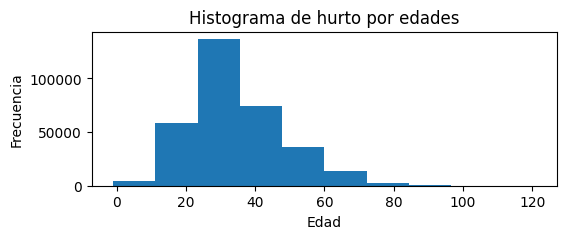

In [98]:
#Histograma de hurto personas por edades

plt.figure(figsize=(6,2)) #tamaño del gráfico
plt.hist(df_hurto_a_persona['edad'])
plt.title('Histograma de hurto por edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

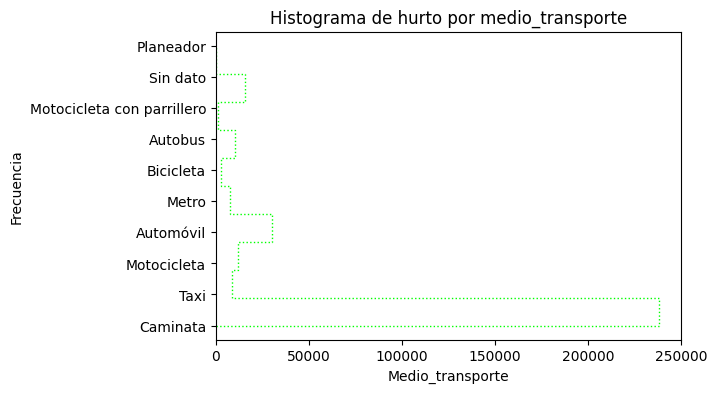

In [99]:
plt.figure(figsize = (6,4))
linestyles = [':']
plt.hist(df_hurto_a_persona['medio_transporte'], color = 'lime', orientation= 'horizontal', histtype = 'step', linestyle = linestyles)
plt.title('Histograma de hurto por medio_transporte')
plt.xlabel('Medio_transporte')
plt.ylabel('Frecuencia')
plt.show()

In [100]:
import seaborn as sns

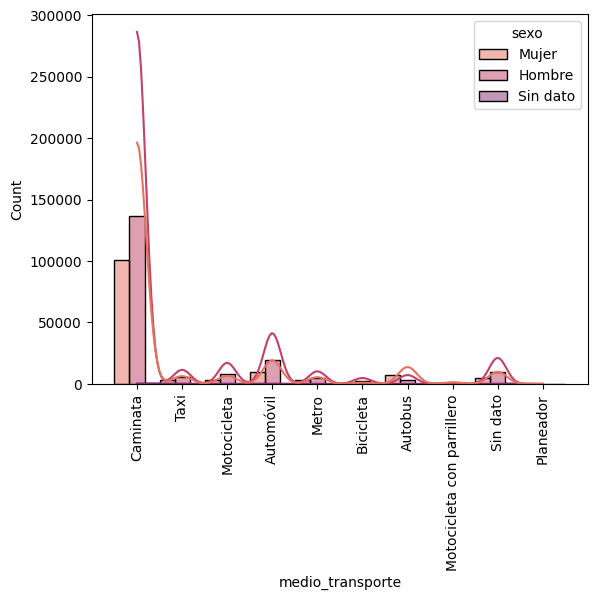

In [101]:
#histograma por medio transporte

sns.histplot(
    data=df_hurto_a_persona,
    x='medio_transporte',
    hue='sexo',
    palette='flare',
    multiple='dodge',
    kde=True,
)
plt.xticks(rotation=90)
plt.show()

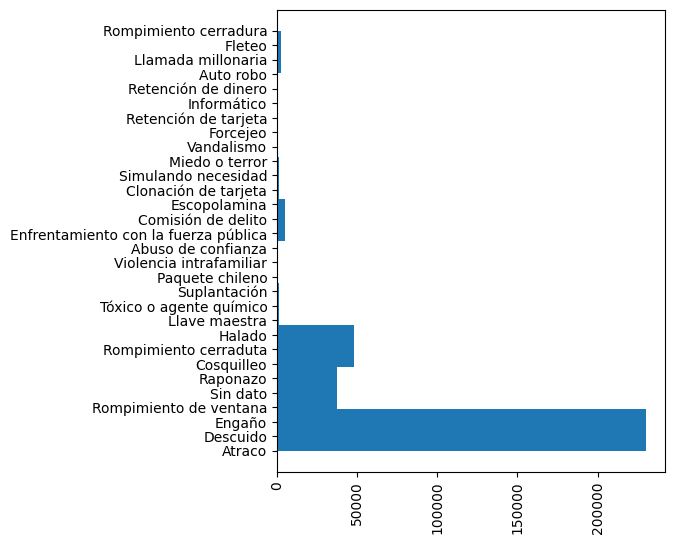

In [102]:
#histograma modalidad de hurto
plt.figure(figsize = (5,6))
plt.hist(df_hurto_a_persona['modalidad'],orientation= 'horizontal')
plt.xticks(rotation=90)
plt.show()

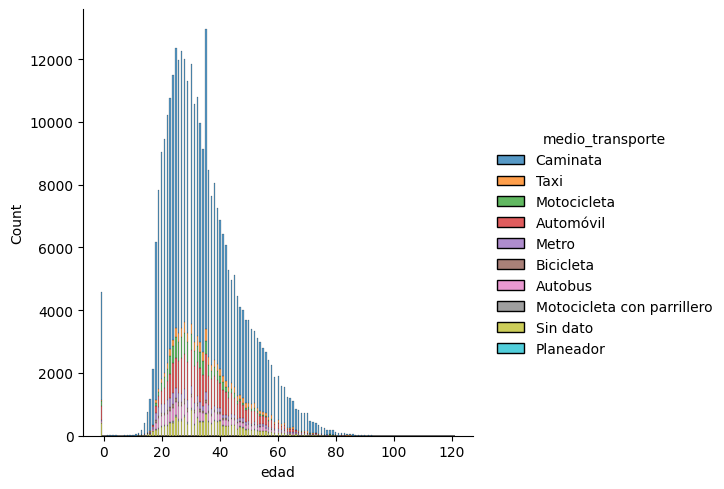

In [103]:
#
sns.displot(
    df_hurto_a_persona,
    x='edad',
    hue='medio_transporte',
    multiple='stack'
)

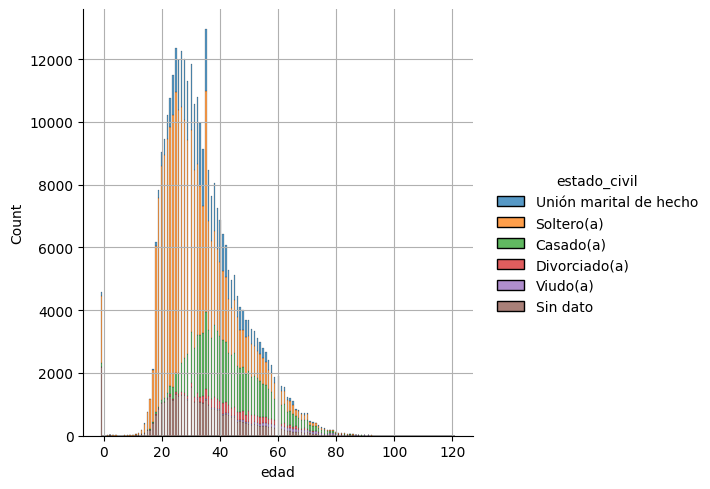

In [104]:
sns.displot(
    df_hurto_a_persona,
    x='edad',
    hue='estado_civil',
    multiple='stack'
)
plt.grid(True)
plt.savefig('hist_edad_Esta.svg') #Guardar en formato de alta definición

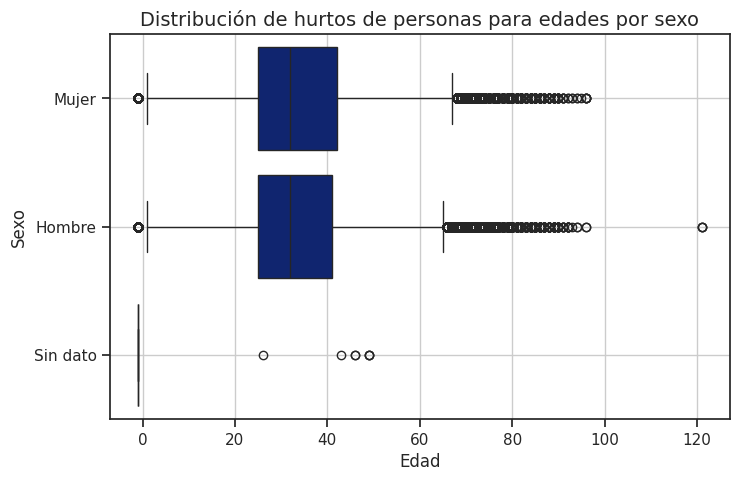

In [114]:
plt.figure(figsize=(8,5))
sns.boxplot(
    y=df_hurto_a_persona['sexo'],
    x=df_hurto_a_persona['edad'],
    orient = 'horizontal')
plt.title(
    'Distribución de hurtos de personas para edades por sexo',
    fontsize=14)
plt.ylabel(
    'Sexo',
    fontsize=12)
plt.xlabel(
    'Edad',
    fontsize=12)
#plt.xticks(rotation=45)
plt.grid(True)
plt.show()

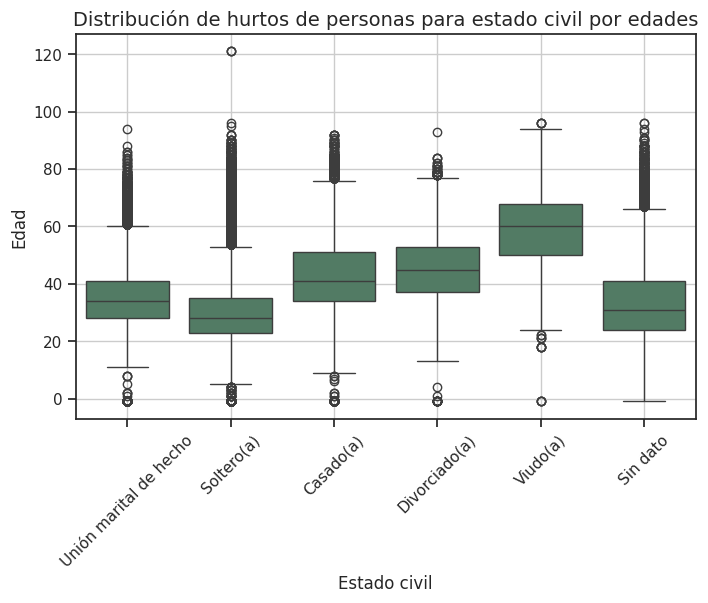

In [158]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=df_hurto_a_persona['estado_civil'],
    y=df_hurto_a_persona['edad'])
plt.title(
    'Distribución de hurtos de personas para estado civil por edades',
    fontsize=14)
plt.xlabel(
    'Estado civil',
    fontsize=12)
plt.ylabel(
    'Edad',
    fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Fuente gráficas:**
seaborn.set

In [151]:
greenv = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)
greenv

[[0.0, 0.0, 0.0],
 [0.0984105469092495, 0.24514994704926324, 0.12794115543252588],
 [0.24184001558699017, 0.46818140513468043, 0.2873901470511341],
 [0.4244341420055591, 0.6599910494364387, 0.4718388527489426],
 [0.65380101476573, 0.8285709484671111, 0.6889726352633602],
 [0.9265795658768193, 0.9696443898309538, 0.9352461575086505]]

In [160]:
diverging2 = sns.diverging_palette(145, 300, s=60)
diverging2

[(0.2923363702661794, 0.5107465581015513, 0.3906173846714218),
 (0.5474272546159912, 0.6867158728122291, 0.6093906292326219),
 (0.8050092608832814, 0.8644036378618783, 0.83030033126024),
 (0.892087997536982, 0.8250175097621365, 0.9037716093370752),
 (0.7761411491983629, 0.5794885770997397, 0.8096721888518108),
 (0.6613156436870031, 0.33633419891183414, 0.7164828207890344)]

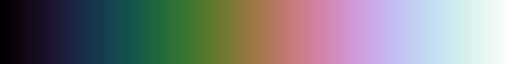

In [161]:
sns.color_palette("cubehelix", as_cmap=True)

In [157]:
sns.set(style='ticks', palette = diverging2, font = 'sans-serif')

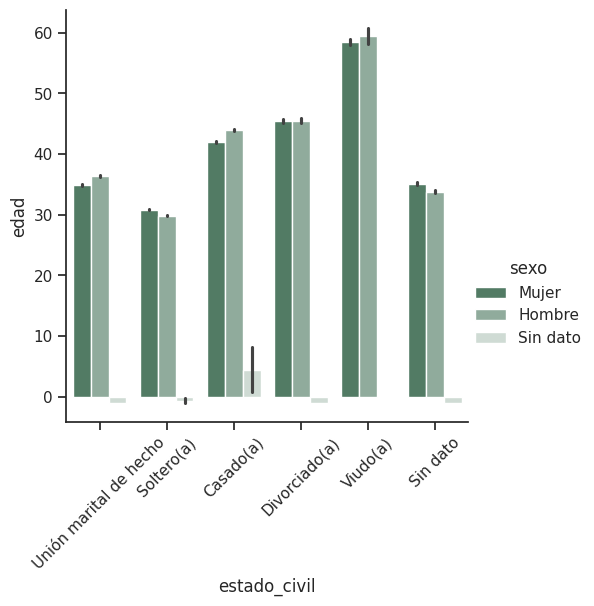

In [165]:
sns.catplot(
    data=df_hurto_a_persona,
    x='estado_civil',
    y='edad',
    hue='sexo',
    kind='bar'
    )
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

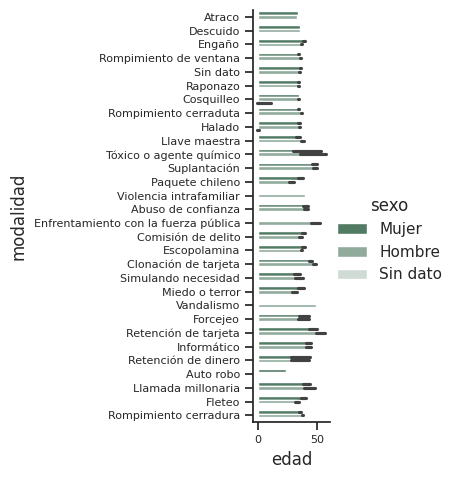

In [181]:
plt.figure(figsize=(10,8))
sns.catplot(
    data=df_hurto_a_persona,
    x='edad',
    y='modalidad',
    hue='sexo',
    kind='bar'
    )
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.show()